# Trabalho Final da disciplina AEDV 
**Estudantes: Juliana Carvalho e Raphael Levy**

**Novembro de 2021**

Passo 1: Escolha da base de dados.


https://www.kaggle.com/smithsonian/volcanic-eruptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

url = "https://raw.githubusercontent.com/JuCarv-bit/RepositoryOfDatabase/main/database.csv"
df = pd.read_csv(url, index_col=0)


In [2]:
#Dropping the rows which contain Null values
df = df.dropna()
df = df[df.Type != 'Unknown']
df = df[df["Last Known Eruption"] != 'Unknown']
df = df[df["Dominant Rock Type"] != 'No Data']



import seaborn as sns
#looks for values containing BCE    
BCE = [s for s in df["Last Known Eruption"] if "BCE" in s]
#removes BCE string
BCE = [x.strip(' BCE') for x in BCE]
#defines them as integers
BCE = list(map(int, BCE))
#add minus sign to BCE years
BCE = [ -x for x in BCE]



CE = [s for s in df["Last Known Eruption"] if " CE" in s]
CE = [x.strip(' CE') for x in CE]
CE = list(map(int, CE))

#merges the BCE and the CE integers to one list
mergedlist = BCE + CE
#print(mergedlist)
#plot the list
sns.distplot(mergedlist)
plt.xlabel("Year")

new_list = []
count_BCE = 0
count_CE = 0
for i in range(0, len(df)):

    escrito_errado = df.iloc[i]["Last Known Eruption"]
  
    if "BCE" in escrito_errado:
        new_list.append(BCE[count_BCE])
        count_BCE+=1
    elif "CE" in escrito_errado:
        new_list.append(CE[count_CE])
        count_CE+=1
    else:
        new_list.append(0.1)
df.drop('Last Known Eruption', inplace=True, axis=1)
df['Year'] = new_list

# Data Preparation - "Type" Column
df["Type"] = df["Type"].str.replace('[(,),?]', '') 
df["Type"] = df["Type"].replace(to_replace=["Calderas","Complexes","Fissure vents","Lava cones", "Maars", "Lava domes", "Pyroclastic cones","Shields", "Stratovolcanoes", "Submarinees", "Tuff cones", "Volcanic fields"], 
value=["Caldera", "Complex","Fissure vent","Lava cone", "Maar", "Lava dome","Pyroclastic cone","Shield", "Stratovolcano", "Submarine", "Tuff cone", "Volcanic field"])




In [3]:
df['Dominant Rock Type'].unique()

Rock_Num = {
    'Foidite':1,
    'Basalt / Picro-Basalt':2,
    'Trachyte / Trachydacite':3,
    'Phono-tephrite /  Tephri-phonolite':4,
    'Phonolite':5,
    'Trachyandesite / Basaltic Trachyandesite':6,
    'Rhyolite':7,
    'Trachybasalt / Tephrite Basanite':8,
    'Andesite / Basaltic Andesite':9,
    'Dacite':10
}

print(Rock_Num)

df1 = pd.DataFrame(list(Rock_Num.items()),columns = ['Dominant Rock Type','Rock Numeric'])

print (df1)
print (type(df1))
df1

#Dropping the rows which contain Null values

new_list2 = []

for i in range(0, len(df)):

    rocha = df.iloc[i]["Dominant Rock Type"]
    new_list2.append(Rock_Num[rocha])  
df['Numeric Rock'] = new_list2

df.head(10)

{'Foidite': 1, 'Basalt / Picro-Basalt': 2, 'Trachyte / Trachydacite': 3, 'Phono-tephrite /  Tephri-phonolite': 4, 'Phonolite': 5, 'Trachyandesite / Basaltic Trachyandesite': 6, 'Rhyolite': 7, 'Trachybasalt / Tephrite Basanite': 8, 'Andesite / Basaltic Andesite': 9, 'Dacite': 10}
                         Dominant Rock Type  Rock Numeric
0                                   Foidite             1
1                     Basalt / Picro-Basalt             2
2                   Trachyte / Trachydacite             3
3        Phono-tephrite /  Tephri-phonolite             4
4                                 Phonolite             5
5  Trachyandesite / Basaltic Trachyandesite             6
6                                  Rhyolite             7
7          Trachybasalt / Tephrite Basanite             8
8              Andesite / Basaltic Andesite             9
9                                    Dacite            10
<class 'pandas.core.frame.DataFrame'>


Name  Country                          Region  \
Number                                                                       
210010  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
210020            Chaine des Puys   France  Mediterranean and Western Asia   
210040   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
211003                    Vulsini    Italy  Mediterranean and Western Asia   
211010              Campi Flegrei    Italy  Mediterranean and Western Asia   
211020                   Vesuvius    Italy  Mediterranean and Western Asia   
211030                     Ischia    Italy  Mediterranean and Western Asia   
211031                   Palinuro    Italy  Mediterranean and Western Asia   
211040                  Stromboli    Italy  Mediterranean and Western Asia   
211042                     Lipari    Italy  Mediterranean and Western Asia   

                    Type  Activity Evidence  Latitude  Longitude  \
Number                                                             
210010              Maar     Eruption Dated    50.170      6.850   
210020         Lava dome     Eruption Dated    45.775      2.970   
210040  Pyroclastic cone     Eruption Dated    38.870     -4.020   
211003           Caldera  Eruption Observed    42.600     11.930   
211010           Caldera  Eruption Observed    40.827     14.139   
211020     Stratovolcano  Eruption Observed    40.821     14.426   
211030           Complex  Eruption Observed    40.730     13.897   
211031         Submarine     Eruption Dated    39.480     14.830   
211040     Stratovolcano  Eruption Observed    38.789     15.213   
211042     Stratovolcano     Eruption Dated    38.490     14.933   

        Elevation (Meters)                        Dominant Rock Type  \
Number                                                                 
210010                 600                                   Foidite   
210020                1464                     Basalt / Picro-Basalt   
210040                1117                     Basalt / Picro-Basalt   
211003                 800                   Trachyte / Trachydacite   
211010                 458                   Trachyte / Trachydacite   
211020                1281        Phono-tephrite /  Tephri-phonolite   
211030                 789                   Trachyte / Trachydacite   
211031                 -70                                 Phonolite   
211040                 924  Trachyandesite / Basaltic Trachyandesite   
211042                 590                                  Rhyolite   

                                    Tectonic Setting  Year  Numeric Rock  
Number                                                                    
210010        Rift Zone / Continental Crust (>25 km) -8300             1  
210020        Rift Zone / Continental Crust (>25 km) -4040             2  
210040       Intraplate / Continental Crust (>25 km) -3600             2  
211003  Subduction Zone / Continental Crust (>25 km)  -104             3  
211010  Subduction Zone / Continental Crust (>25 km)  1538             3  
211020  Subduction Zone / Continental Crust (>25 km)  1944             4  
211030  Subduction Zone / Continental Crust (>25 km)  1302             3  
211031  Subduction Zone / Continental Crust (>25 km) -8040             5  
211040  Subduction Zone / Continental Crust (>25 km)  2016             6  
211042  Subduction Zone / Continental Crust (>25 km)  1230             7

Posições distintas por país

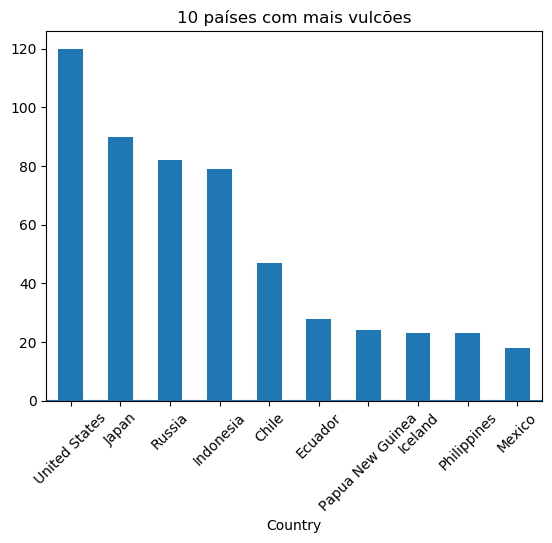

In [4]:
#df.groupby('Country').concat('Latitude', 'Longitude').unique()
#df2 = pd.DataFrame.agg('Latitude','Longitude')
#df2 = pd.DataFrame(list(),columns = ['Latitude,Longitude', 'Country']))

df['LatLong'] = df['Latitude'].astype(str) +', ' + df['Longitude'].astype(str)
df

df2 = df.groupby('Country').LatLong.nunique().sort_values(ascending=False).head(10).plot(kind = "bar", rot = 45, title = "10 países com mais vulcões")
plt.show()

1) 10 países com mais atividade vulcânica:

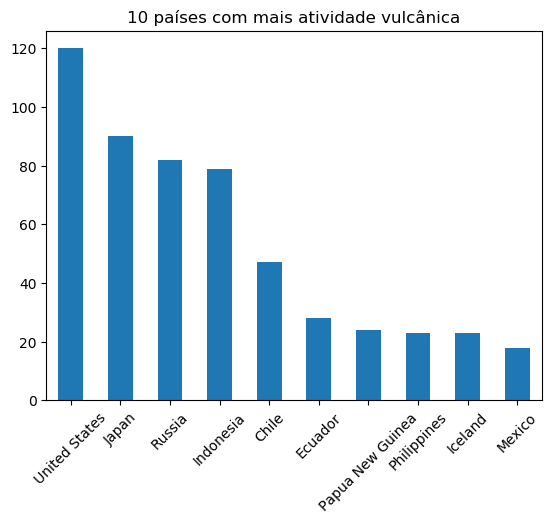

In [5]:
df["Country"].value_counts().head(10).plot(kind = "bar", rot = 45, title = "10 países com mais atividade vulcânica")
plt.show()

In [6]:
df["Country"].value_counts().head(10)  

United States       120
Japan                90
Russia               82
Indonesia            79
Chile                47
Ecuador              28
Papua New Guinea     24
Philippines          23
Iceland              23
Mexico               18
Name: Country, dtype: int64

10 países com mais atividade vulcânica separados por cor

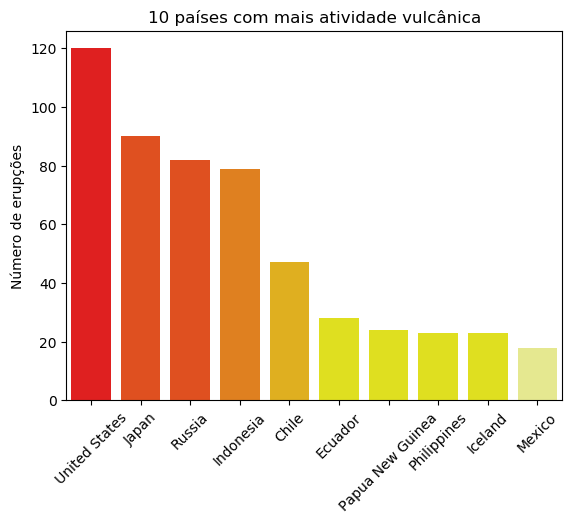

In [7]:
values = df["Country"].value_counts().head(10)  
idx = df["Country"].value_counts().head(10).index
clrs = ['#FF0000','#FF4000','#FF4000','#FF8000', '#FFBF00','#FFFF00', '#FFFF00','#FFFF00', '#FFFF00','#F3F781']
ax = sns.barplot(x=idx, y=values, palette=clrs) # color=clrs)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_title("10 países com mais atividade vulcânica")
plt.ylabel("Países") #y label
plt.ylabel("Número de erupções") #y label
plt.show()

In [8]:
df.head()

Name  Country                          Region  \
Number                                                                       
210010  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
210020            Chaine des Puys   France  Mediterranean and Western Asia   
210040   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
211003                    Vulsini    Italy  Mediterranean and Western Asia   
211010              Campi Flegrei    Italy  Mediterranean and Western Asia   

                    Type  Activity Evidence  Latitude  Longitude  \
Number                                                             
210010              Maar     Eruption Dated    50.170      6.850   
210020         Lava dome     Eruption Dated    45.775      2.970   
210040  Pyroclastic cone     Eruption Dated    38.870     -4.020   
211003           Caldera  Eruption Observed    42.600     11.930   
211010           Caldera  Eruption Observed    40.827     14.139   

        Elevation (Meters)       Dominant Rock Type  \
Number                                                
210010                 600                  Foidite   
210020                1464    Basalt / Picro-Basalt   
210040                1117    Basalt / Picro-Basalt   
211003                 800  Trachyte / Trachydacite   
211010                 458  Trachyte / Trachydacite   

                                    Tectonic Setting  Year  Numeric Rock  \
Number                                                                     
210010        Rift Zone / Continental Crust (>25 km) -8300             1   
210020        Rift Zone / Continental Crust (>25 km) -4040             2   
210040       Intraplate / Continental Crust (>25 km) -3600             2   
211003  Subduction Zone / Continental Crust (>25 km)  -104             3   
211010  Subduction Zone / Continental Crust (>25 km)  1538             3   

                           LatLong  
Number                              
210010                 50.17, 6.85  
210020                45.775, 2.97  
210040                38.87, -4.02  
211003                 42.6, 11.93  
211010  40.827, 14.139000000000001

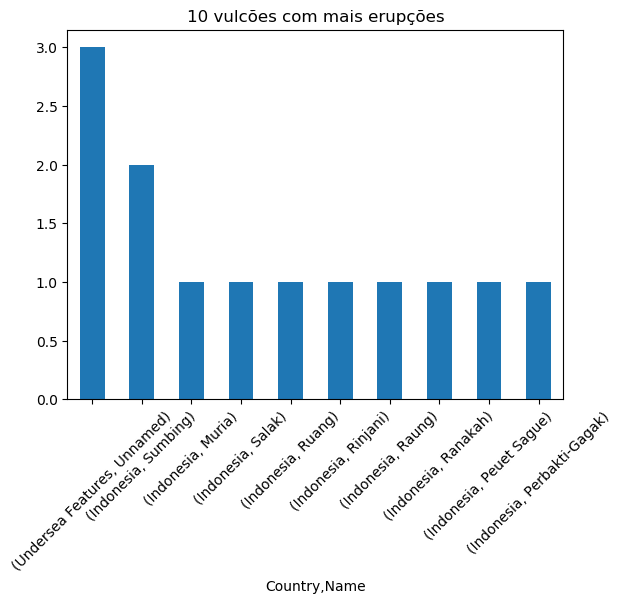

In [9]:
df3 = df.groupby('Country').Name.value_counts().sort_values(ascending=False).head(10).plot(kind = "bar", rot = 45, title = "10 vulcões com mais erupções")
plt.show()

2) Tipo de falha tectônica:

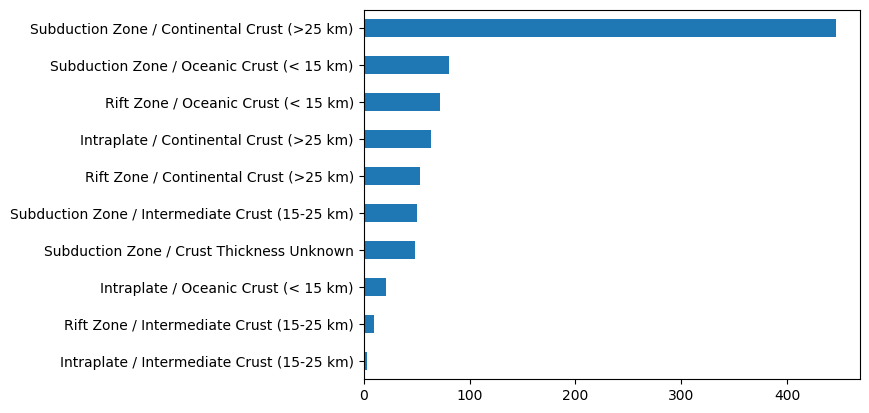

In [10]:
df["Tectonic Setting"].value_counts().sort_values().plot(kind='barh')
plt.show()

3) Distribuição da elevação de vulcões ao redor do mundo

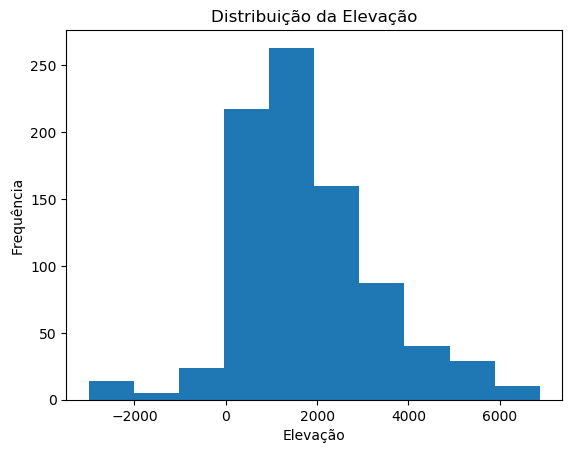

In [11]:
plt.hist(df["Elevation (Meters)"])
plt.title("Distribuição da Elevação")
plt.ylabel("Frequência")
plt.xlabel("Elevação")
plt.show()

4) 10 tipos mais comuns de vulcões:

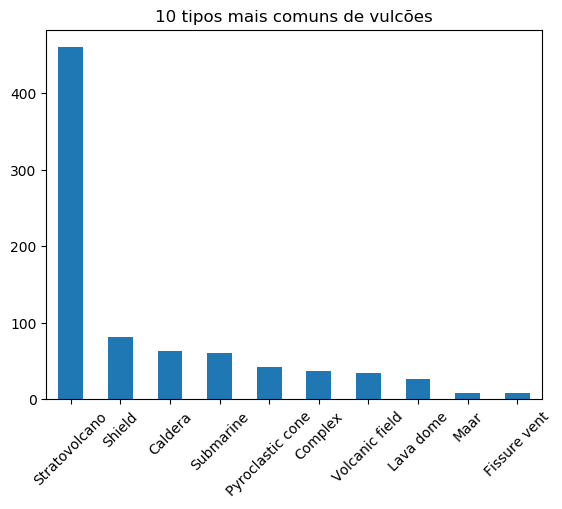

In [12]:
df["Type"].value_counts().head(10).plot(kind = "bar", rot = 45, title = "10 tipos mais comuns de vulcões")
plt.show()

In [13]:
# Creating and Displaying World map
import plotly.express as px
import geopandas as gpd
fig = px.scatter_geo(df, lat=df.Latitude, lon=df.Longitude, hover_name="Name", color="Region")
fig.show()

In [14]:
# Creating Scatter Plot
import plotly.express as px
fig = px.scatter(df, x='Region', y='Country', color='Type', title="DIFFERENT TYPES OF VOLCANOES IN DIFFERENT COUNTRIES AND REGIONS")

# Displaying Scatter Plot
fig.show()

In [15]:

minimo_tudo = minValuesObj = df.min()
minimo_elevacao = minimo_tudo[7]
print('eleva', minimo_elevacao)
df.head()

eleva -3000


Name  Country                          Region  \
Number                                                                       
210010  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
210020            Chaine des Puys   France  Mediterranean and Western Asia   
210040   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
211003                    Vulsini    Italy  Mediterranean and Western Asia   
211010              Campi Flegrei    Italy  Mediterranean and Western Asia   

                    Type  Activity Evidence  Latitude  Longitude  \
Number                                                             
210010              Maar     Eruption Dated    50.170      6.850   
210020         Lava dome     Eruption Dated    45.775      2.970   
210040  Pyroclastic cone     Eruption Dated    38.870     -4.020   
211003           Caldera  Eruption Observed    42.600     11.930   
211010           Caldera  Eruption Observed    40.827     14.139   

        Elevation (Meters)       Dominant Rock Type  \
Number                                                
210010                 600                  Foidite   
210020                1464    Basalt / Picro-Basalt   
210040                1117    Basalt / Picro-Basalt   
211003                 800  Trachyte / Trachydacite   
211010                 458  Trachyte / Trachydacite   

                                    Tectonic Setting  Year  Numeric Rock  \
Number                                                                     
210010        Rift Zone / Continental Crust (>25 km) -8300             1   
210020        Rift Zone / Continental Crust (>25 km) -4040             2   
210040       Intraplate / Continental Crust (>25 km) -3600             2   
211003  Subduction Zone / Continental Crust (>25 km)  -104             3   
211010  Subduction Zone / Continental Crust (>25 km)  1538             3   

                           LatLong  
Number                              
210010                 50.17, 6.85  
210020                45.775, 2.97  
210040                38.87, -4.02  
211003                 42.6, 11.93  
211010  40.827, 14.139000000000001

## Será que o seu tipo de rocha está relacionada com a elevação do vulcão?

In [16]:
import plotly.graph_objects as go
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df["Country"] +", "+df['Name'] + ', ' + df['Dominant Rock Type'] + ', '+ df['Numeric Rock'].astype(str) + ', '  + df['Elevation (Meters)'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['text'],
        mode = 'markers',
        
        marker = dict(
            size = 0.2*(abs(minimo_elevacao)+df['Elevation (Meters)']),
            sizemode = "area",
            sizeref = 9,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = True,
            symbol = df['Numeric Rock'],
            colorscale = 'Sunset',
            #cmin = 0,
            color = df['Elevation (Meters)'],
            cmax = df['Elevation (Meters)'].max(),
            colorbar_title="Elevação"
        )))

fig.update_layout(
        title =  '<b>Tipos de rocha por elevação</b><br>(Passe o mouse sobre os marcadores para ver os dados)',
        geo = dict(
            showland=True, landcolor="#000000",
            showocean=True, oceancolor="rgb(100, 100, 100)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.1,
            subunitwidth = 0.1
        ),
    )
fig.show()


Huuum, parece que a cor verde está mais associada a quadrados, e a cor vermelha associada a cruzes e triângulos...

In [17]:
import folium
m = folium.Map(location=[0, 0], zoom_start=1)
labels = pd.factorize(df["Region"])[0]
loc = 'Elevação de Vulcoes ao redor do mundo'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
for i in range(0,len(df)):
    folium.CircleMarker(
      location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
      radius=float(abs(df.iloc[i]["Elevation (Meters)"]))/200,
      popup = df.iloc[i]["Name"],
      color = float(labels[i]),
      fill=True,
      fill_color= "red"
   ).add_to(m)
m.get_root().html.add_child(folium.Element(title_html))
folium.LayerControl().add_to(m)
m

In [18]:
print(df["Dominant Rock Type"].value_counts())
df

Andesite / Basaltic Andesite                386
Basalt / Picro-Basalt                       264
Dacite                                       64
Trachybasalt / Tephrite Basanite             39
Rhyolite                                     36
Trachyte / Trachydacite                      28
Trachyandesite / Basaltic Trachyandesite     18
Phonolite                                     6
Foidite                                       6
Phono-tephrite /  Tephri-phonolite            2
Name: Dominant Rock Type, dtype: int64


Name         Country  \
Number                                              
210010  West Eifel Volcanic Field         Germany   
210020            Chaine des Puys          France   
210040   Calatrava Volcanic Field           Spain   
211003                    Vulsini           Italy   
211010              Campi Flegrei           Italy   
...                           ...             ...   
390081             Montagu Island  United Kingdom   
390090                   Saunders  United Kingdom   
390100           Candlemas Island  United Kingdom   
390130                 Zavodovski  United Kingdom   
390140        Protector Seamounts  United Kingdom   

                                Region              Type  Activity Evidence  \
Number                                                                        
210010  Mediterranean and Western Asia              Maar     Eruption Dated   
210020  Mediterranean and Western Asia         Lava dome     Eruption Dated   
210040  Mediterranean and Western Asia  Pyroclastic cone     Eruption Dated   
211003  Mediterranean and Western Asia           Caldera  Eruption Observed   
211010  Mediterranean and Western Asia           Caldera  Eruption Observed   
...                                ...               ...                ...   
390081                      Antarctica            Shield  Eruption Observed   
390090                      Antarctica     Stratovolcano  Eruption Observed   
390100                      Antarctica     Stratovolcano  Eruption Observed   
390130                      Antarctica     Stratovolcano  Eruption Observed   
390140                      Antarctica         Submarine  Eruption Observed   

        Latitude  Longitude  Elevation (Meters)       Dominant Rock Type  \
Number                                                                     
210010    50.170      6.850                 600                  Foidite   
210020    45.775      2.970                1464    Basalt / Picro-Basalt   
210040    38.870     -4.020                1117    Basalt / Picro-Basalt   
211003    42.600     11.930                 800  Trachyte / Trachydacite   
211010    40.827     14.139                 458  Trachyte / Trachydacite   
...          ...        ...                 ...                      ...   
390081   -58.445    -26.374                1370    Basalt / Picro-Basalt   
390090   -57.800    -26.483                 843    Basalt / Picro-Basalt   
390100   -57.080    -26.670                 550    Basalt / Picro-Basalt   
390130   -56.300    -27.570                 551    Basalt / Picro-Basalt   
390140   -55.912    -28.167                 -55                 Rhyolite   

                                    Tectonic Setting  Year  Numeric Rock  \
Number                                                                     
210010        Rift Zone / Continental Crust (>25 km) -8300             1   
210020        Rift Zone / Continental Crust (>25 km) -4040             2   
210040       Intraplate / Continental Crust (>25 km) -3600             2   
211003  Subduction Zone / Continental Crust (>25 km)  -104             3   
211010  Subduction Zone / Continental Crust (>25 km)  1538             3   
...                                              ...   ...           ...   
390081     Subduction Zone / Oceanic Crust (< 15 km)  2007             2   
390090     Subduction Zone / Oceanic Crust (< 15 km)  2015             2   
390100     Subduction Zone / Oceanic Crust (< 15 km)  1911             2   
390130     Subduction Zone / Oceanic Crust (< 15 km)  2016             2   
390140     Subduction Zone / Oceanic Crust (< 15 km)  1962             7   

                             LatLong  \
Number                                 
210010                   50.17, 6.85   
210020                  45.775, 2.97   
210040                  38.87, -4.02   
211003                   42.6, 11.93   
211010    40.827, 14.139000000000001   
...                              ...   
390081  -58.4

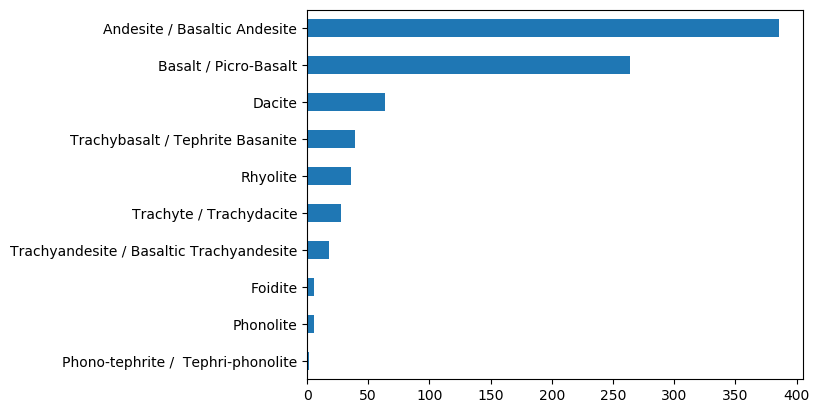

In [19]:
df["Dominant Rock Type"].value_counts().sort_values().plot(kind='barh')
plt.show()

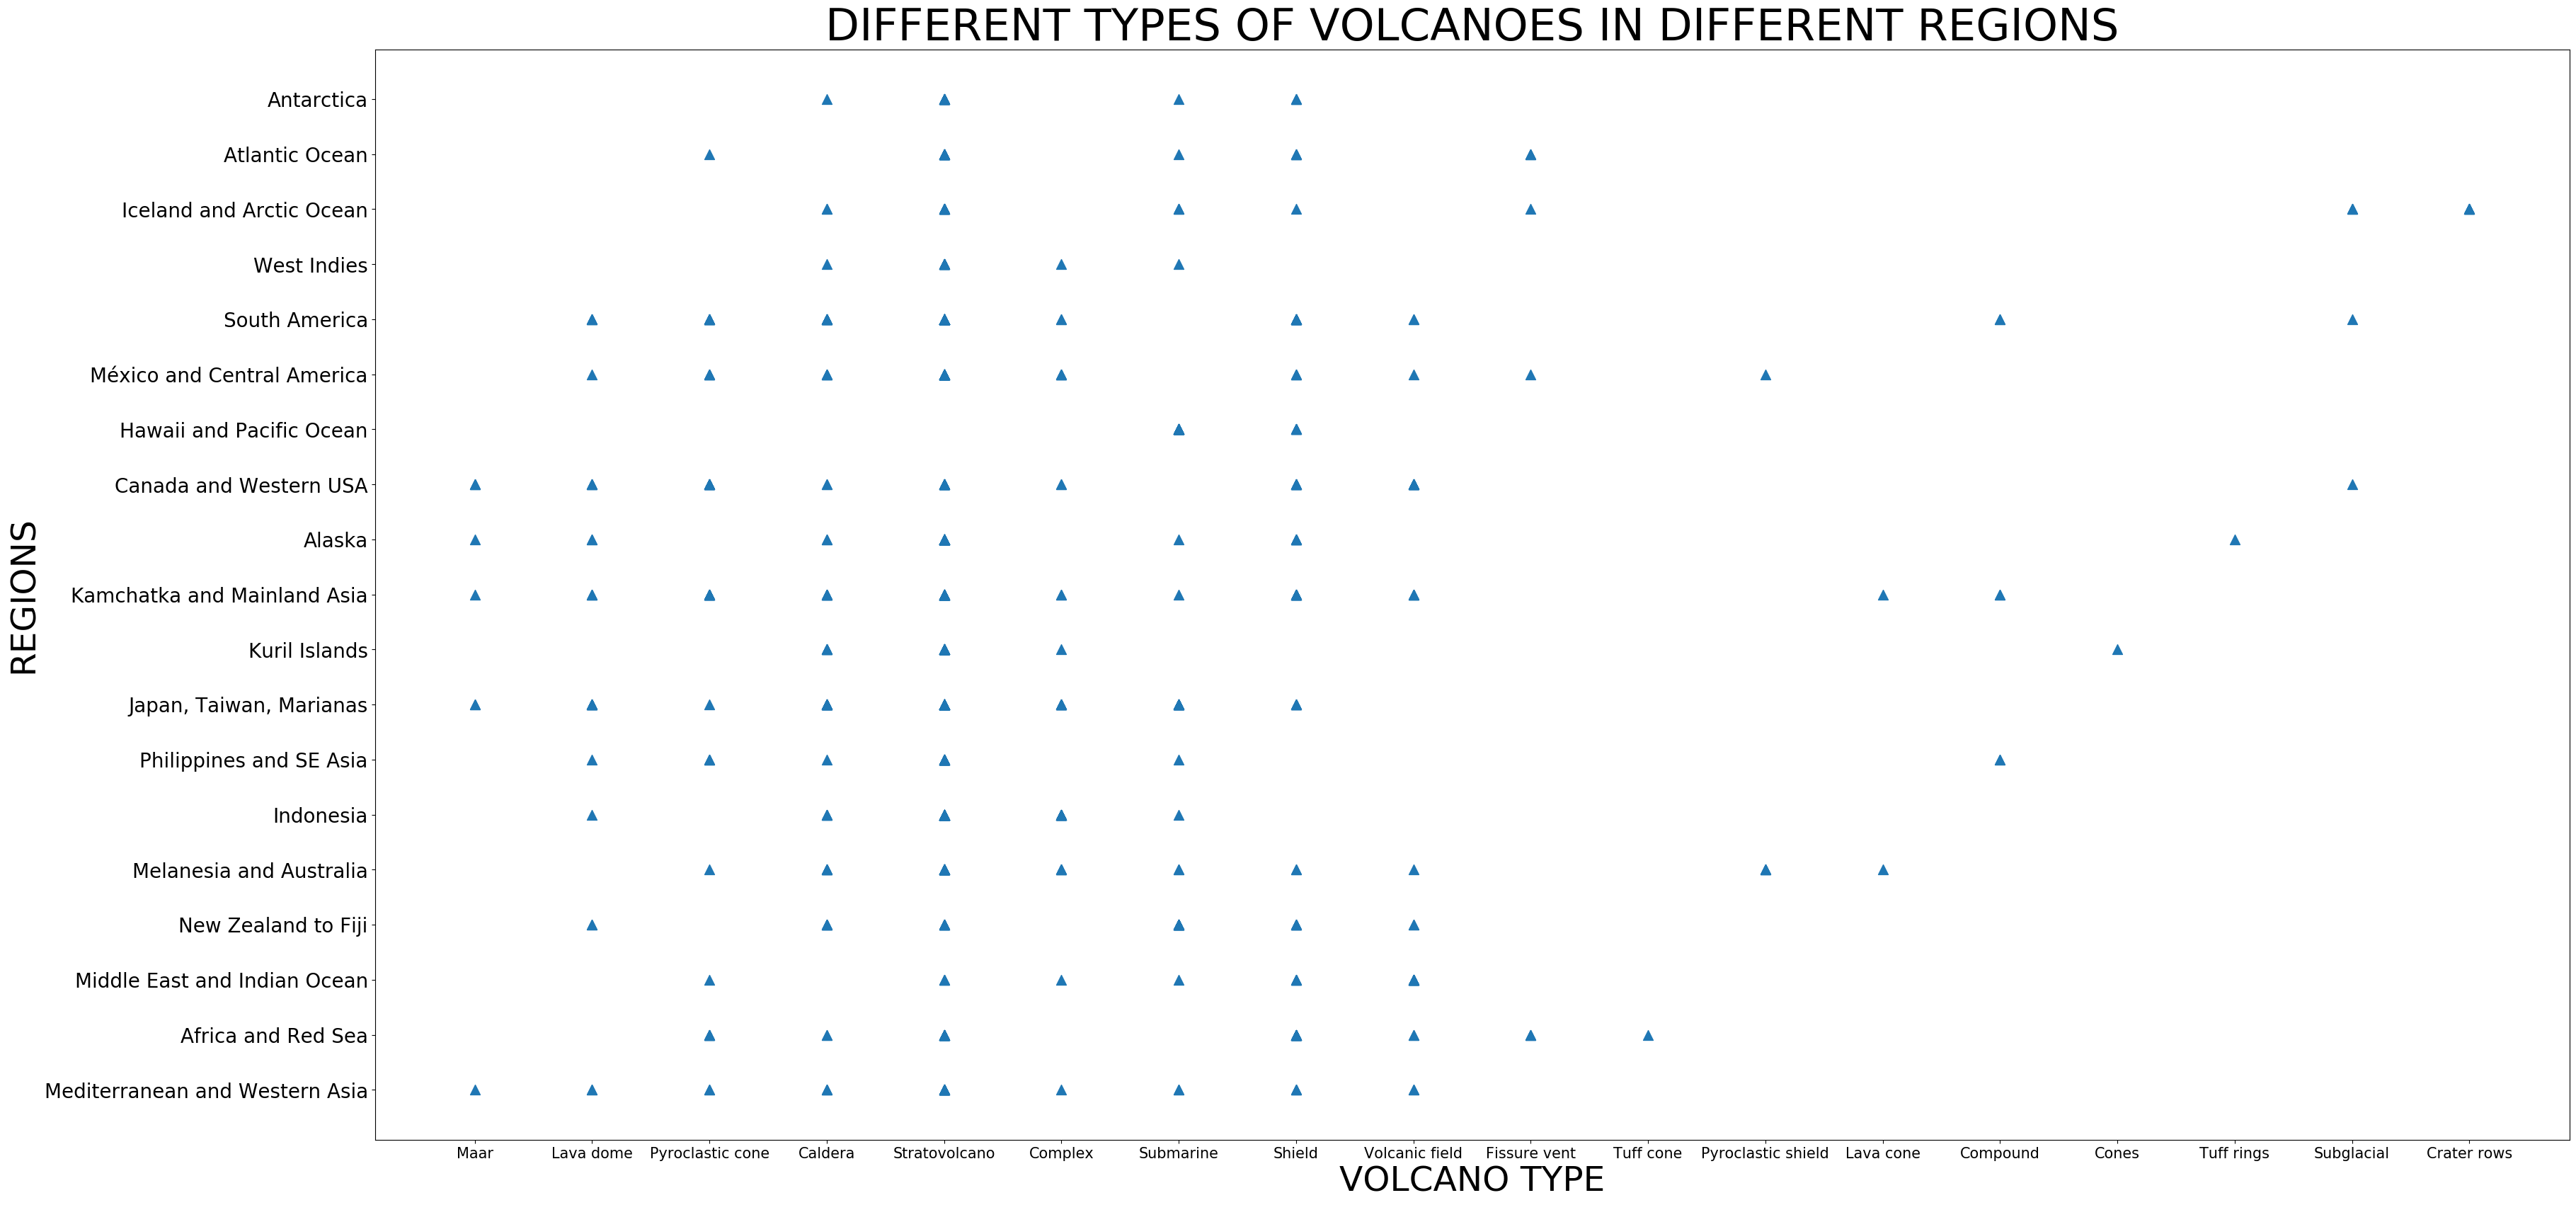

In [20]:
# Creating Scatter Plot
fig = plt.figure(figsize =(40, 20)) 
plt.scatter(df["Type"], df["Region"], marker="^", s=100) 
plt.xlabel("VOLCANO TYPE", fontsize=35) 
plt.xticks(fontsize=15)
plt.ylabel("REGIONS", fontsize=35) 
plt.yticks(fontsize=20)
plt.title("DIFFERENT TYPES OF VOLCANOES IN DIFFERENT REGIONS", fontsize=45)

# Displaying Scatter Plot
plt.show() 

In [21]:
# Dropping the Number Column
df.columns

Index(['Name', 'Country', 'Region', 'Type', 'Activity Evidence', 'Latitude',
       'Longitude', 'Elevation (Meters)', 'Dominant Rock Type',
       'Tectonic Setting', 'Year', 'Numeric Rock', 'LatLong', 'text'],
      dtype='object')

In [22]:
"""
from wordcloud import WordCloud

text= ' '
for s, row in volcanoes.iterrows():
    text = " ".join([text,"_".join(row['Country'].strip().split(" "))])
text = text.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(width=600, height=300, max_font_size=60, max_words=20, collocations=False).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("20 Countries with most recently erupted volcanoes", fontsize=30)
plt.axis("off")
plt.show()
"""

'\nfrom wordcloud import WordCloud\n\ntext= \' \'\nfor s, row in volcanoes.iterrows():\n    text = " ".join([text,"_".join(row[\'Country\'].strip().split(" "))])\ntext = text.strip()\n\nplt.figure(figsize=(12,6))\nwordcloud = WordCloud(width=600, height=300, max_font_size=60, max_words=20, collocations=False).generate(text)\nwordcloud.recolor(random_state=0)\nplt.imshow(wordcloud)\nplt.title("20 Countries with most recently erupted volcanoes", fontsize=30)\nplt.axis("off")\nplt.show()\n'

In [23]:
df.columns
df.head()

Name  Country                          Region  \
Number                                                                       
210010  West Eifel Volcanic Field  Germany  Mediterranean and Western Asia   
210020            Chaine des Puys   France  Mediterranean and Western Asia   
210040   Calatrava Volcanic Field    Spain  Mediterranean and Western Asia   
211003                    Vulsini    Italy  Mediterranean and Western Asia   
211010              Campi Flegrei    Italy  Mediterranean and Western Asia   

                    Type  Activity Evidence  Latitude  Longitude  \
Number                                                             
210010              Maar     Eruption Dated    50.170      6.850   
210020         Lava dome     Eruption Dated    45.775      2.970   
210040  Pyroclastic cone     Eruption Dated    38.870     -4.020   
211003           Caldera  Eruption Observed    42.600     11.930   
211010           Caldera  Eruption Observed    40.827     14.139   

        Elevation (Meters)       Dominant Rock Type  \
Number                                                
210010                 600                  Foidite   
210020                1464    Basalt / Picro-Basalt   
210040                1117    Basalt / Picro-Basalt   
211003                 800  Trachyte / Trachydacite   
211010                 458  Trachyte / Trachydacite   

                                    Tectonic Setting  Year  Numeric Rock  \
Number                                                                     
210010        Rift Zone / Continental Crust (>25 km) -8300             1   
210020        Rift Zone / Continental Crust (>25 km) -4040             2   
210040       Intraplate / Continental Crust (>25 km) -3600             2   
211003  Subduction Zone / Continental Crust (>25 km)  -104             3   
211010  Subduction Zone / Continental Crust (>25 km)  1538             3   

                           LatLong  \
Number                               
210010                 50.17, 6.85   
210020                45.775, 2.97   
210040                38.87, -4.02   
211003                 42.6, 11.93   
211010  40.827, 14.139000000000001   

                                                     text  
Number                                                     
210010  Germany, West Eifel Volcanic Field, Foidite, 1...  
210020  France, Chaine des Puys, Basalt / Picro-Basalt...  
210040  Spain, Calatrava Volcanic Field, Basalt / Picr...  
211003    Italy, Vulsini, Trachyte / Trachydacite, 3, 800  
211010  Italy, Campi Flegrei, Trachyte / Trachydacite,...

In [24]:
"""
#adding animation to bubble plot
px.scatter(df,x='Dominant Rock Type',y='Type',color='Region', color_discrete_sequence=["red", "blue", "yellow", "green", "#C8FF33"], size='Elevation (Meters)',size_max=70,
          hover_name='Country', animation_frame='Last Known Eruption',
          animation_group='Country', range_x=[0,8], range_y=[30,90], labels={"lifeExp": "Life expectancy at birth, total ...", "childs_per_woman":"Fertility rate, total (birth by woman)"})

"""

'\n#adding animation to bubble plot\npx.scatter(df,x=\'Dominant Rock Type\',y=\'Type\',color=\'Region\', color_discrete_sequence=["red", "blue", "yellow", "green", "#C8FF33"], size=\'Elevation (Meters)\',size_max=70,\n          hover_name=\'Country\', animation_frame=\'Last Known Eruption\',\n          animation_group=\'Country\', range_x=[0,8], range_y=[30,90], labels={"lifeExp": "Life expectancy at birth, total ...", "childs_per_woman":"Fertility rate, total (birth by woman)"})\n\n'

In [25]:
minimo = df.min()[10]
maximo = df.max()[10]
step = 2000
ranges = np.arange(minimo-1, maximo+1, step)
ranges = ranges.tolist()
ranges.append(np.inf)
print(ranges)
names = ['<'+str(ranges[1]), str(ranges[1])+' a '+str(ranges[2]), str(ranges[2])+' a '+str(ranges[3]),str(ranges[3])+' a '+str(ranges[4]),str(ranges[4])+' a '+str(ranges[5]), str(ranges[5])+' a '+str(ranges[6]), 
         ' > '+str(ranges[6])]
print(len(names), len(ranges))
dfm = df
dfm['Intervalo'] = pd.cut(df['Year'], ranges, labels=names)

dfm['Intervalo']

dfm['2Intervalos'] = pd.cut(df['Year'], [-np.inf, 0, np.inf], labels=["BCE", "CE"])

dfm['2Intervalos']


[-10451, -8451, -6451, -4451, -2451, -451, 1549, inf]
7 8


Number
210010    BCE
210020    BCE
210040    BCE
211003    BCE
211010     CE
         ... 
390081     CE
390090     CE
390100     CE
390130     CE
390140     CE
Name: 2Intervalos, Length: 849, dtype: category
Categories (2, object): [BCE < CE]

In [26]:
df["Intervalo"] = dfm['Intervalo']
df["2Intervalos"] = dfm['2Intervalos']
df

Name         Country  \
Number                                              
210010  West Eifel Volcanic Field         Germany   
210020            Chaine des Puys          France   
210040   Calatrava Volcanic Field           Spain   
211003                    Vulsini           Italy   
211010              Campi Flegrei           Italy   
...                           ...             ...   
390081             Montagu Island  United Kingdom   
390090                   Saunders  United Kingdom   
390100           Candlemas Island  United Kingdom   
390130                 Zavodovski  United Kingdom   
390140        Protector Seamounts  United Kingdom   

                                Region              Type  Activity Evidence  \
Number                                                                        
210010  Mediterranean and Western Asia              Maar     Eruption Dated   
210020  Mediterranean and Western Asia         Lava dome     Eruption Dated   
210040  Mediterranean and Western Asia  Pyroclastic cone     Eruption Dated   
211003  Mediterranean and Western Asia           Caldera  Eruption Observed   
211010  Mediterranean and Western Asia           Caldera  Eruption Observed   
...                                ...               ...                ...   
390081                      Antarctica            Shield  Eruption Observed   
390090                      Antarctica     Stratovolcano  Eruption Observed   
390100                      Antarctica     Stratovolcano  Eruption Observed   
390130                      Antarctica     Stratovolcano  Eruption Observed   
390140                      Antarctica         Submarine  Eruption Observed   

        Latitude  Longitude  Elevation (Meters)       Dominant Rock Type  \
Number                                                                     
210010    50.170      6.850                 600                  Foidite   
210020    45.775      2.970                1464    Basalt / Picro-Basalt   
210040    38.870     -4.020                1117    Basalt / Picro-Basalt   
211003    42.600     11.930                 800  Trachyte / Trachydacite   
211010    40.827     14.139                 458  Trachyte / Trachydacite   
...          ...        ...                 ...                      ...   
390081   -58.445    -26.374                1370    Basalt / Picro-Basalt   
390090   -57.800    -26.483                 843    Basalt / Picro-Basalt   
390100   -57.080    -26.670                 550    Basalt / Picro-Basalt   
390130   -56.300    -27.570                 551    Basalt / Picro-Basalt   
390140   -55.912    -28.167                 -55                 Rhyolite   

                                    Tectonic Setting  Year  Numeric Rock  \
Number                                                                     
210010        Rift Zone / Continental Crust (>25 km) -8300             1   
210020        Rift Zone / Continental Crust (>25 km) -4040             2   
210040       Intraplate / Continental Crust (>25 km) -3600             2   
211003  Subduction Zone / Continental Crust (>25 km)  -104             3   
211010  Subduction Zone / Continental Crust (>25 km)  1538             3   
...                                              ...   ...           ...   
390081     Subduction Zone / Oceanic Crust (< 15 km)  2007             2   
390090     Subduction Zone / Oceanic Crust (< 15 km)  2015             2   
390100     Subduction Zone / Oceanic Crust (< 15 km)  1911             2   
390130     Subduction Zone / Oceanic Crust (< 15 km)  2016             2   
390140     Subduction Zone / Oceanic Crust (< 15 km)  1962             7   

                             LatLong  \
Number                                 
210010                   50.17, 6.85   
210020                  45.775, 2.97   
210040                  38.87, -4.02   
211003                   42.6, 11.93   
211010    40.827, 14.139000000000001   
...                              ...   
390081  -58.4

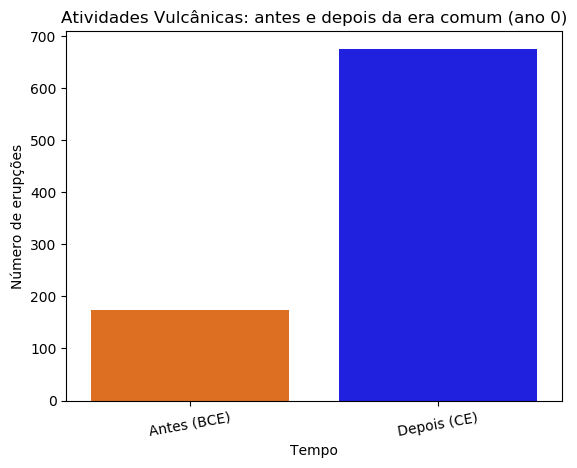

In [28]:
temp = df
values = [len(df[df["Year"] < 0]), len(df) - len(df[df["Year"] < 0])]
idx = ["Antes (BCE)", "Depois (CE)"]
clrs = ['#FC6A03','blue']
ax = sns.barplot(x=idx, y=values, palette=clrs) # color=clrs)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
ax.set_title("Atividades Vulcânicas: antes e depois da era comum (ano 0)")
plt.xlabel("Tempo") #y label
plt.ylabel("Número de erupções") #y label
plt.show()

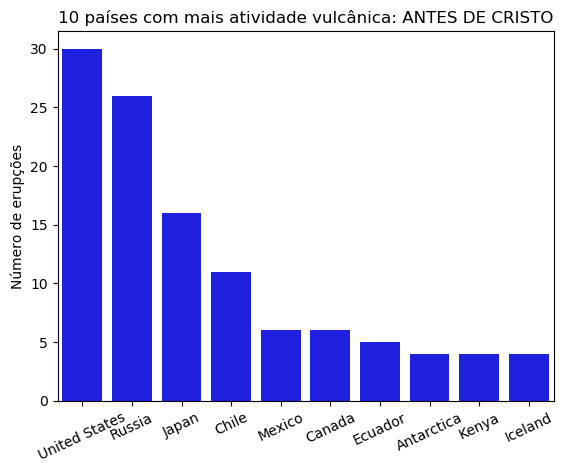

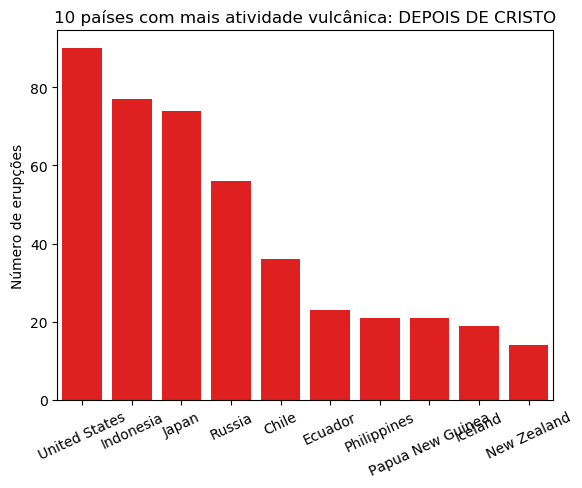

In [63]:
#values = [len(df[df["Year"] < 0])
#Antes
TOP = 10

paises_mais_comum = df[df["Year"] < 0]
values = paises_mais_comum["Country"].value_counts().head(TOP)  
idx = paises_mais_comum["Country"].value_counts().head(TOP).index
#clrs = ['#FF0000','#FF4000','#FF4000','#FF8000', '#FFBF00','#FFFF00', '#FFFF00','#FFFF00', '#FFFF00','#F3F781']
ax = sns.barplot(x=idx, y=values, color="blue")
#sns.set_palette(reversed(sns.color_palette("Blues_d", TOP)), TOP)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
ax.set_title("10 países com mais atividade vulcânica: ANTES DE CRISTO")
plt.ylabel("Países") #y label
plt.ylabel("Número de erupções") #y label
plt.show()

paises_mais_comum_dps_cristo = df[df["Year"] >= 0]
values = paises_mais_comum_dps_cristo["Country"].value_counts().head(TOP)  
idx = paises_mais_comum_dps_cristo["Country"].value_counts().head(TOP).index
#clrs = ['#FF0000','#FF4000','#FF4000','#FF8000', '#FFBF00','#FFFF00', '#FFFF00','#FFFF00', '#FFFF00','#F3F781']
ax = sns.barplot(x=idx, y=values, color="red")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 25)
ax.set_title("10 países com mais atividade vulcânica: DEPOIS DE CRISTO")
plt.ylabel("Países") #y label
plt.ylabel("Número de erupções") #y label
plt.show()



In [34]:
paises_mais_comum["Country"].value_counts().head(10)  



United States    30
Russia           26
Japan            16
Chile            11
Mexico            6
Canada            6
Ecuador           5
Antarctica        4
Kenya             4
Iceland           4
Name: Country, dtype: int64

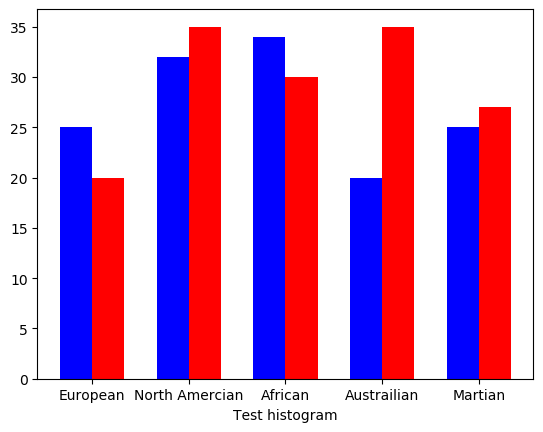

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# The data
womenMeans = (25, 32, 34, 20, 25)
menMeans = (20, 35, 30, 35, 27)
indices = range(len(womenMeans))
names = ['Asian','European','North Amercian','African','Austrailian','Martian']
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width/2.,womenMeans,width,color='b',label='-Ymin')
ax.bar(indices+width/2.,menMeans,width,color='r',label='Ymax')
#tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(names)
ax.set_xlabel('Test histogram')
plt.show()